# Fundamentals of Data Analysis Tasks

---

**Author: Damien Farrell**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import joypy
import plotly.express as px

sns.set_theme()

## Task One

> The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer $x$ and repeatedly apply the function $f(x)$ below, you always get stuck in the repeating sequence $1, 4, 2, 1, 4, 2, ...$
> $$
> f(n) = 
> \begin{cases} 
> n \div 2 & \text{if } n \text{ is even} \\
> 3n + 1 & \text{if } n \text{ is odd}
> \end{cases}
> $$
> Your task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.

---

**Function f(x) to carry out the calculation.**

In [2]:
def f(x):
    if x % 2 == 0:
        return x // 2
    else:
        return (3 * x) + 1

**Fuction collatz(x) to loop through the calculation until $x = 1$.**

In [3]:
def collatz(x, verbose=False):
    while x != 1:
        if verbose:
            print(x, end=', ')
        x = f(x)
    if verbose:
        print(x, end='\n')
        print()
    return x

**Fuction verify(y) to verify the Collatz conjecture on $y$ number of positive integers.**

In [4]:
def verify(y, verbose=False):
    for i in range(1, y + 1):
        result = collatz(i, verbose)
        if result != 1:
            print(f'The Collatz conjecture is false, it failed on integer {i}')
            return

    print(f'The Collatz conjecture is verified to be true on {y:,} number of positive integers')

<p>To show the calculation on each iteration, set verbose = True.<sup id="fnref:1"><a href="#fn:1">1</a></sup></p>

In [5]:
verify(10_000, verbose=False)

The Collatz conjecture is verified to be true on 10,000 number of positive integers


---

## Task Two

> Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables that should be used to model them in Python, explaining your rationale.

<br>

---

In [6]:
url_name = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'

df = pd.read_csv(url_name)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<p><strong>Determining the unique values for the categorical variables:</strong><sup id="fnref:1"><a href="#fn:1">2</a></sup></p>

In [8]:
df.dropna(inplace=True)
numerical_variables = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
categorical_variables = df[['species', 'island']].astype('category')
boolean_variable = df[['sex']].astype('bool')

for variable in categorical_variables:
  print(df[variable].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


In [9]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [10]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


**Overview:**

I need to write in an overview. What the dataset contains. How many rows etc.

REMINDER!!!


**Explaining the Types of Variables:**

*Species (Categorical Variable):* <br>
- This variable represents the species of penguins, and it is categorical nominal scale variable. It is not ordinal because the species names are categories without a specific order.
- It has three possible categories: Adelie, Chinstrap, and Gentoo. In the dataframe it is an object which contain strings. An dataframe object is a catch-all data type that can represent various types of data.
- It is a discete statistic distribution.

*Island (Categorical Variable):* <br>
- The dataset includes the island where the penguins were observed: Biscoe, Dream, and Torgersen. 
- Like the "Species" variable, this is a categorical nominal scale variable. In the dataframe it is an object which contain strings.
- It is a discete statistic distribution.

*Bill Length (Numerical Variable):* <br>
- This variable represents the length of the penguin's bill. It is a numerical variable which which has a floating-point data type. 
- It has a ratio scale of measurement as is a continuous numerical variable that has a true zero point (0 mm represents the absence of bill length), and it supports all arithmetic operations, including addition, subtraction, multiplication, and division.
- It is a continuous statistic distribution.

*Bill Depth (Numerical Variable):* <br>
- Similar to bill length, this variable represents the depth of the penguin's bill. It is a real numerical variable which has a floating-point data type.
- It has a ratio scale of measurement.
- It is a continuous statistic distribution.

*Flipper Length (Numerical Variable):* <br>
- This variable represents the length of the penguin's flipper. It is a real numerical variable which has a floating-point data type.
- It has a ratio scale of measurement.
- It is a continuous statistic distribution.

*Body Mass (Numerical Variable):* <br>
- Body mass represents the weight of the penguins. It is a real numerical variable which which has a floating-point data type.
- It has a ratio scale of measurement.
- It is a continuous statistic distribution.

*Sex (Categorical Variable):* <br>
- The dataset includes the sex of the penguins. This is categorical nominal scale variable and has three categories: Male, Female, and NaN (missing data).
- In the dataframe it is an object which contains strings and null values.
- It is a discete statistic distribution.


**Suggest the types of variables that should be used to model them in Python, explaining your rationale:**

The type of variables to use when modeling the Penguins dataset ???  

What the variables are now and what they should be?!?!


---
## Task Three

> For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.

<br>

---


In [11]:
# Ignore specific warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [12]:
df[df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


**Investigating each variable to determine the best fit:**

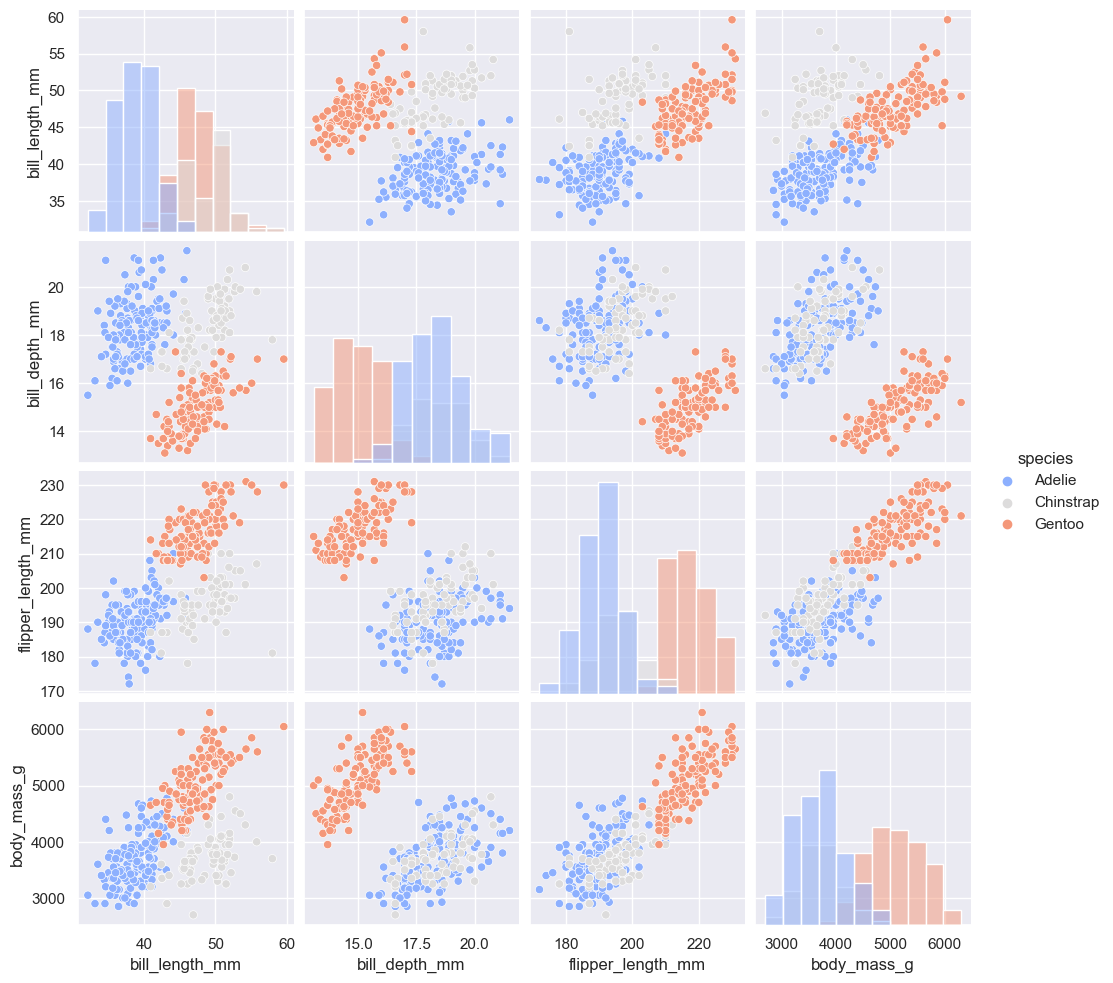

In [13]:
sns.pairplot(df, hue='species', diag_kind='hist', palette='coolwarm');

**Function distribution_test(variable_name) to automatically identify the best-fitting distribution among multiple continuous variable candidates using Kolmogorov–Smirnov Test (KS), P-Values, and  Akaike Information Criterion (AIC)**

In [14]:
def distribution_test(variable_name):
    
    results = []  # To store the results
    numpy_distributions = ['beta', 'chi2', 'expon', 'f', 'gamma', 'gumbel_r', 'gumbel_l', 'laplace', 'logistic', 'lognorm', 'norm', 'pareto', 
                           'powerlaw', 'powerlognorm', 'rayleigh', 'cauchy', 'exponpow', 't', 'triang', 'uniform', 'wald', 'weibull_min', 'weibull_max']

    for distribution in numpy_distributions:
        params = getattr(stats, distribution).fit(variable_name)
        stat, p_value = stats.kstest(variable_name, distribution, args=params)
        
        # Calculate AIC
        dist = getattr(stats, distribution)(*params)
        log_likelihood = dist.logpdf(variable_name).sum()
        k = len(params)  # Number of parameters
        aic = 2 * k - 2 * log_likelihood
        
        # Store the results in a dictionary
        result = {
            'Distribution': distribution,
            'KS Statistic': stat,
            'P-value': p_value,
            'AIC': aic
        }
        results.append(result)

    # Create a DataFrame from the results
    test_df = pd.DataFrame.from_dict(results)
    test_df = test_df.sort_values(by='KS Statistic', ascending=True).reset_index(drop=True).head(10)
    
    return test_df

#### **Bill Length**

In [15]:
distribution_test(df['bill_length_mm'])

,Distribution,KS Statistic,P-value,AIC
0,t,0.071009,0.066272,2081.569725
1,norm,0.071234,0.064862,2079.568961
2,gamma,0.073180,0.053707,2081.363963
3,lognorm,0.076172,0.039781,2081.315973
4,logistic,0.077114,0.036103,2104.735577
5,f,0.078140,0.032442,2083.237608
6,beta,0.079836,0.027099,2063.890613
7,gumbel_l,0.080825,0.024355,2117.996960
8,weibull_min,0.082529,0.020201,2068.916055
9,triang,0.092268,0.006439,2079.762630


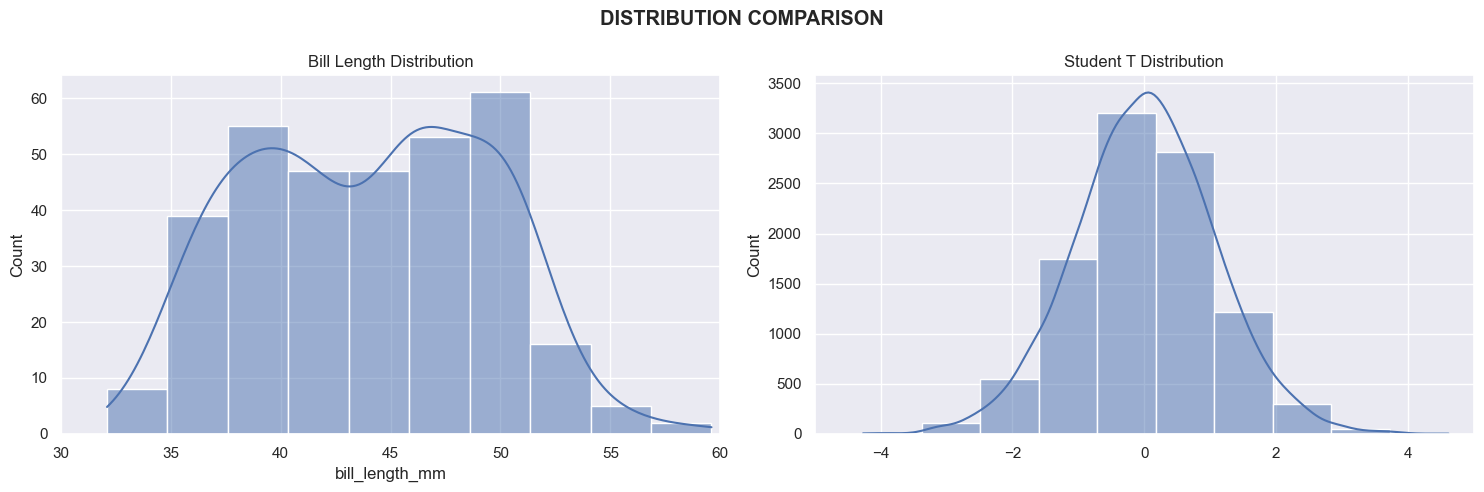

In [16]:
degrees_of_freedom = 20  
num_samples = 10000  
t_distribution = np.random.standard_t(degrees_of_freedom, size=num_samples)

figure, axes = plt.subplots(1, 2, figsize=(15, 5))
figure.suptitle('DISTRIBUTION COMPARISON', fontweight='bold')

axes[0].set_title('Bill Length Distribution')
axes[0].set_xlim(30, 60)
sns.histplot(df[numerical_variables.columns[0]], kde=True, bins=10, ax=axes[0])

axes[1].set_title('Student T Distribution')
axes[1].set_xlim(-5, 5)
sns.histplot(t_distribution, kde=True, bins=10, ax=axes[1])

plt.tight_layout()

#### **Bill Depth**

In [17]:
distribution_test(df['bill_depth_mm'])

,Distribution,KS Statistic,P-value,AIC
0,gumbel_l,0.059132,0.187096,1414.241923
1,weibull_max,0.061792,0.150784,1389.952997
2,powerlognorm,0.066059,0.104535,1401.892907
3,triang,0.070831,0.067409,1373.667662
4,logistic,0.073864,0.050200,1422.317549
5,beta,0.074563,0.046817,1370.655327
6,weibull_min,0.074661,0.046360,1390.950106
7,norm,0.080111,0.026309,1399.323380
8,t,0.080254,0.025907,1401.323597
9,lognorm,0.080624,0.024891,1401.653605


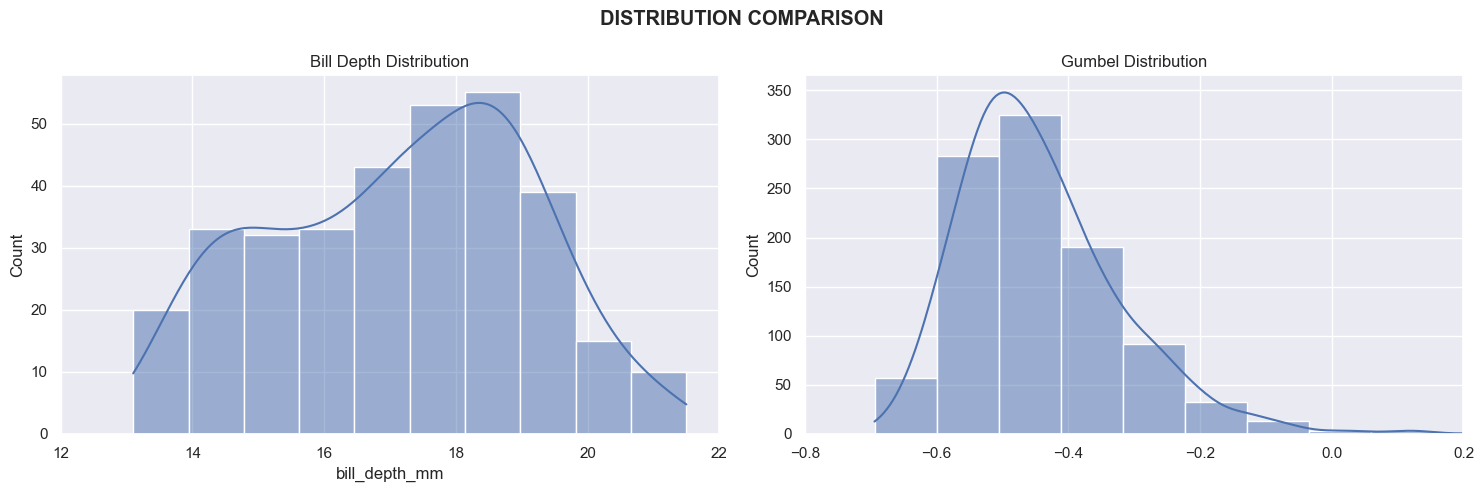

In [18]:
mu, beta = -0.5, 0.1
gumbel_distribution = np.random.gumbel(mu, beta, 1000)

figure, axes = plt.subplots(1, 2, figsize=(15, 5))
figure.suptitle('DISTRIBUTION COMPARISON', fontweight='bold')

axes[0].set_title('Bill Depth Distribution')
axes[0].set_xlim(12, 22)
sns.histplot(df[numerical_variables.columns[1]], kde=True, bins=10, ax=axes[0])

axes[1].set_title('Gumbel Distribution')
axes[1].set_xlim(-0.8, 0.2)
sns.histplot(gumbel_distribution, kde=True, bins=10, ax=axes[1])

plt.tight_layout()

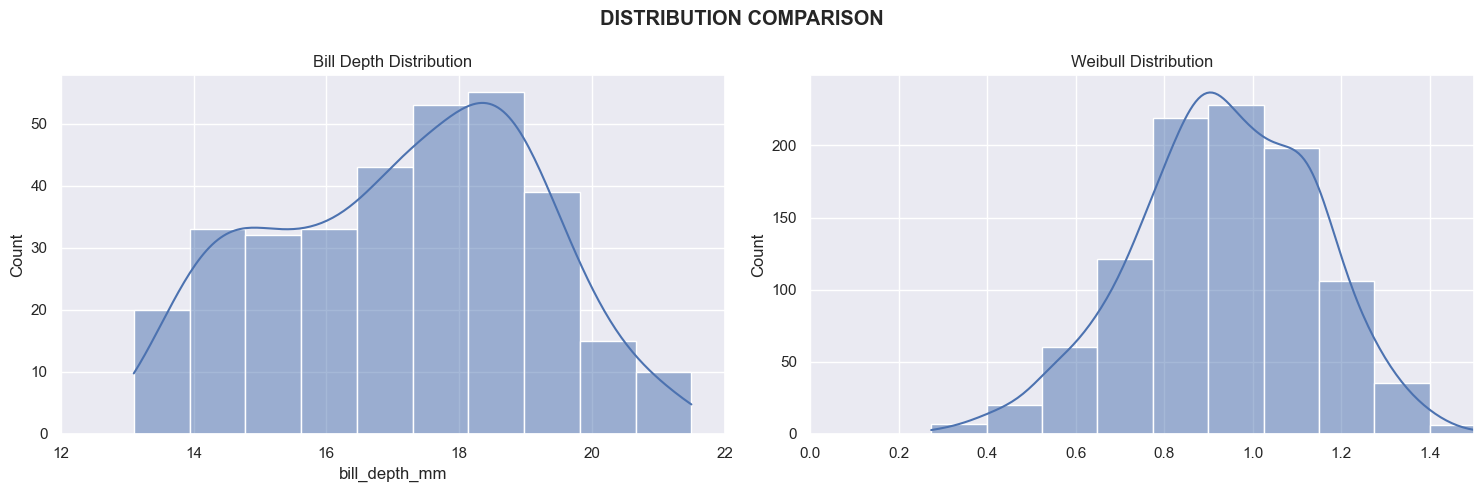

In [19]:
weibull_distribution = np.random.weibull(5, 1000)

figure, axes = plt.subplots(1, 2, figsize=(15, 5))
figure.suptitle('DISTRIBUTION COMPARISON', fontweight='bold')

axes[0].set_title('Bill Depth Distribution')
axes[0].set_xlim(12, 22)
sns.histplot(df[numerical_variables.columns[1]], kde=True, bins=10, ax=axes[0])

axes[1].set_title('Weibull Distribution')
axes[1].set_xlim(0, 1.5)
sns.histplot(weibull_distribution, kde=True, bins=10, ax=axes[1])

plt.tight_layout()

#### **Flipper Length**

In [20]:
distribution_test(df['flipper_length_mm'])

,Distribution,KS Statistic,P-value,AIC
0,rayleigh,0.083458,0.018215,2687.069240
1,powerlognorm,0.087682,0.011208,2687.281545
2,gamma,0.093758,0.005345,2685.945587
3,chi2,0.093758,0.005345,2685.945587
4,weibull_min,0.093820,0.005303,2682.263305
5,weibull_max,0.095760,0.004142,2688.843095
6,triang,0.096350,0.003839,2657.681776
7,lognorm,0.096785,0.003628,2689.591019
8,gumbel_r,0.102400,0.001711,2690.851354
9,logistic,0.106153,0.001011,2731.426587


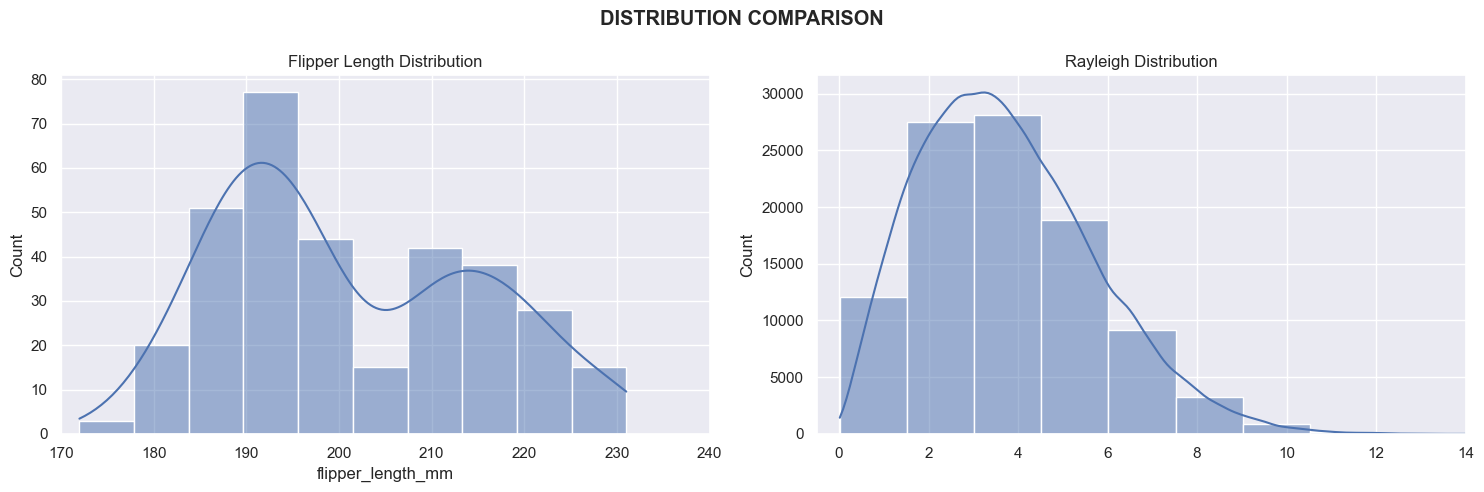

In [21]:
rayleigh_distribution = np.random.rayleigh(3, 100000)

figure, axes = plt.subplots(1, 2, figsize=(15, 5))
figure.suptitle('DISTRIBUTION COMPARISON', fontweight='bold')

axes[0].set_title('Flipper Length Distribution')
axes[0].set_xlim(170,240)
sns.histplot(df[numerical_variables.columns[2]], kde=True, bins=10, ax=axes[0])

axes[1].set_title('Rayleigh Distribution')
axes[1].set_xlim(-.5, 14)
sns.histplot(rayleigh_distribution, kde=True, bins=10, ax=axes[1])

plt.tight_layout()

#### **Body Mass**

In [22]:
distribution_test(df['body_mass_g'])

,Distribution,KS Statistic,P-value,AIC
0,triang,0.045247,0.488946,5347.963331
1,gamma,0.055582,0.245774,5373.155607
2,gumbel_r,0.060784,0.163826,5378.801585
3,rayleigh,0.065274,0.112025,5366.657222
4,weibull_min,0.068303,0.085371,5368.614973
5,beta,0.072504,0.057380,5362.129655
6,f,0.075628,0.042049,5383.713377
7,logistic,0.088909,0.009690,5423.577963
8,t,0.105870,0.001053,5406.291050
9,norm,0.105890,0.001050,5404.291031


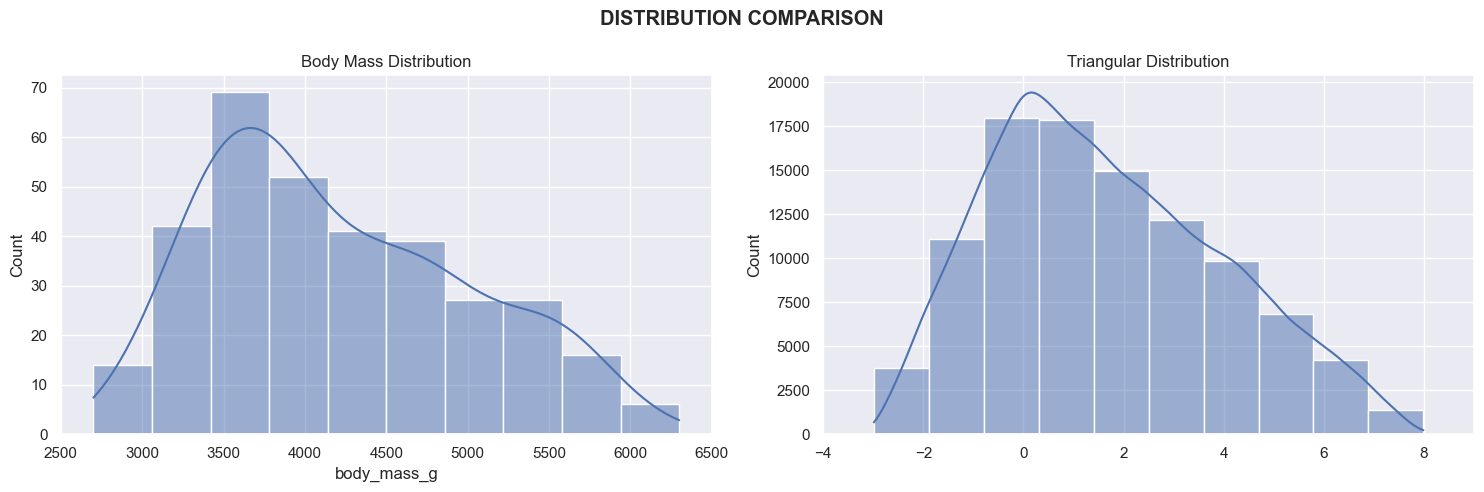

In [23]:
triangular_distribution = np.random.triangular(-3, 0, 8, 100000)

figure, axes = plt.subplots(1, 2, figsize=(15, 5))
figure.suptitle('DISTRIBUTION COMPARISON', fontweight='bold')

axes[0].set_title('Body Mass Distribution')
axes[0].set_xlim(2500, 6500)
sns.histplot(df[numerical_variables.columns[3]], kde=True, bins=10, ax=axes[0])

axes[1].set_title('Triangular Distribution')
axes[1].set_xlim(-4, 9)
sns.histplot(triangular_distribution, kde=True, bins=10, ax=axes[1])

plt.tight_layout()

#### **Species**

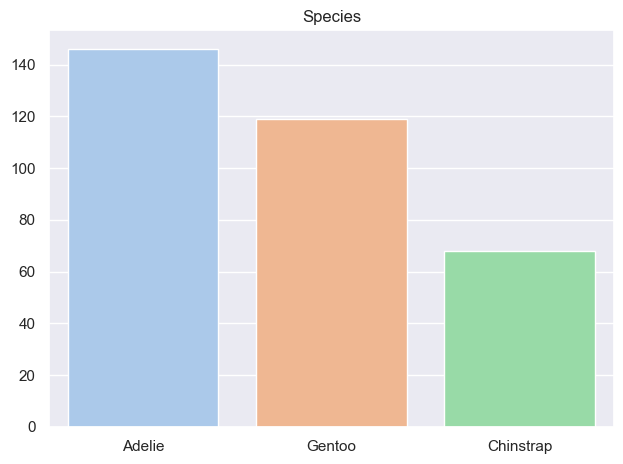

In [24]:
c = df['species'].value_counts()
sns.barplot(x=c.index,y=c.values, palette='pastel')
plt.title('Species')

plt.tight_layout()

Find the probablity distibution for the discrete variables....

Binominal?

#### **Island**

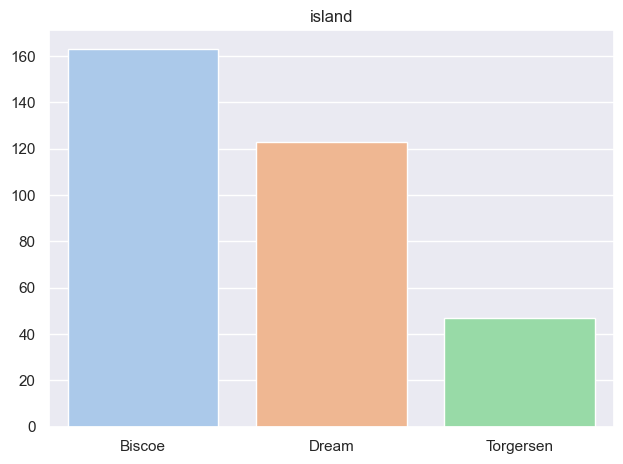

In [25]:
c = df['island'].value_counts()
sns.barplot(x=c.index,y=c.values, palette='pastel')
plt.title('island')

plt.tight_layout()

#### **Sex**

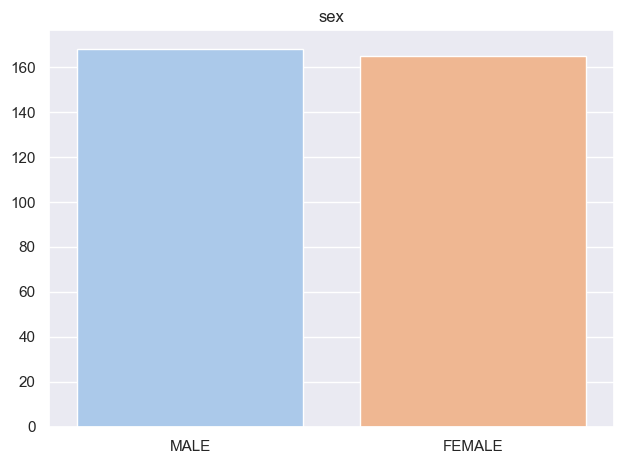

In [26]:
c = df['sex'].value_counts()
sns.barplot(x=c.index,y=c.values, palette='pastel')
plt.title('sex')

plt.tight_layout()

---
## Task Four

> Suppose you are flipping two coins, each with a probability $p$ of giving heads. Plot the entropy of the total number of heads versus $p$.

<br>

---

**Entropy Formula**

$ H(X) := - \sum_{x \in X} p(x) \log p(x) $

**For one coin:**

$ H(X) = -p(0) \log p(0) - p(1) \log p(1) $

$ H(X) = -(1 - p(1)) \log (1 - p(1)) - p(1) \log p(1) $

Let $p = p(1)$.

$ H(p) = -(1 - p) \log (1 - p) - p \log p $


**For two coins:**

There are four possible outcomes when flipping two coins: 0H, 1H, 1H, and 2H.

$ P (0 $ heads$) = (1-p)^2 $

$ P (1 $ heads$) = 2p(1-p) $

$ P (2 $ heads$) = p^2 $

$ H(X) = -(1 - p)^2 \log (1 - p)^2 - 2p(1 - p) \log (2p(1 - p)) - p^2 \log p^2 $

In [27]:
# Entropy for one coin.
def H_one_coin(p):
    return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)

# Entropy for two coins.
def H_two_coins(p):
    return -((1-p)**2 * np.log2(1-p) + 2*p*(1-p) * np.log2(p*(1-p)) + p**2 * np.log2(p))

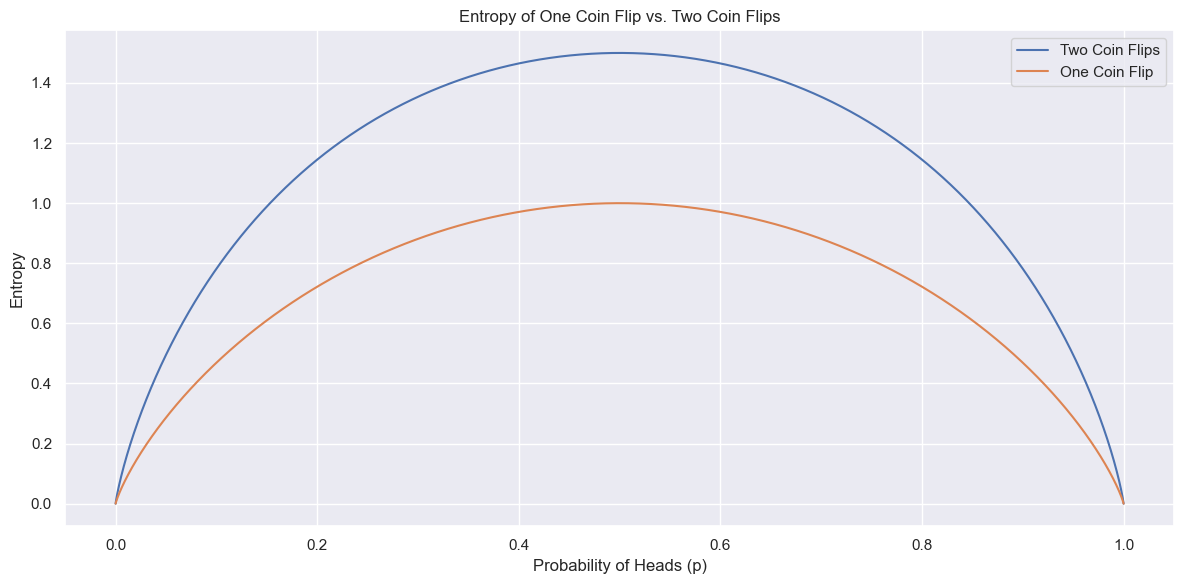

In [36]:
# p is a probability.
p = np.linspace(0.00000001, 0.99999999, 10001)

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x=p, y=H_two_coins(p), label='Two Coin Flips')
sns.lineplot(x=p, y=H_one_coin(p), label='One Coin Flip')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Entropy')
plt.title('Entropy of One Coin Flip vs. Two Coin Flips')
plt.legend()
plt.tight_layout()

---
## Task Five

> Create an appropriate individual plot for each of the variables in the penguin data set.

<br>

---

In [29]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


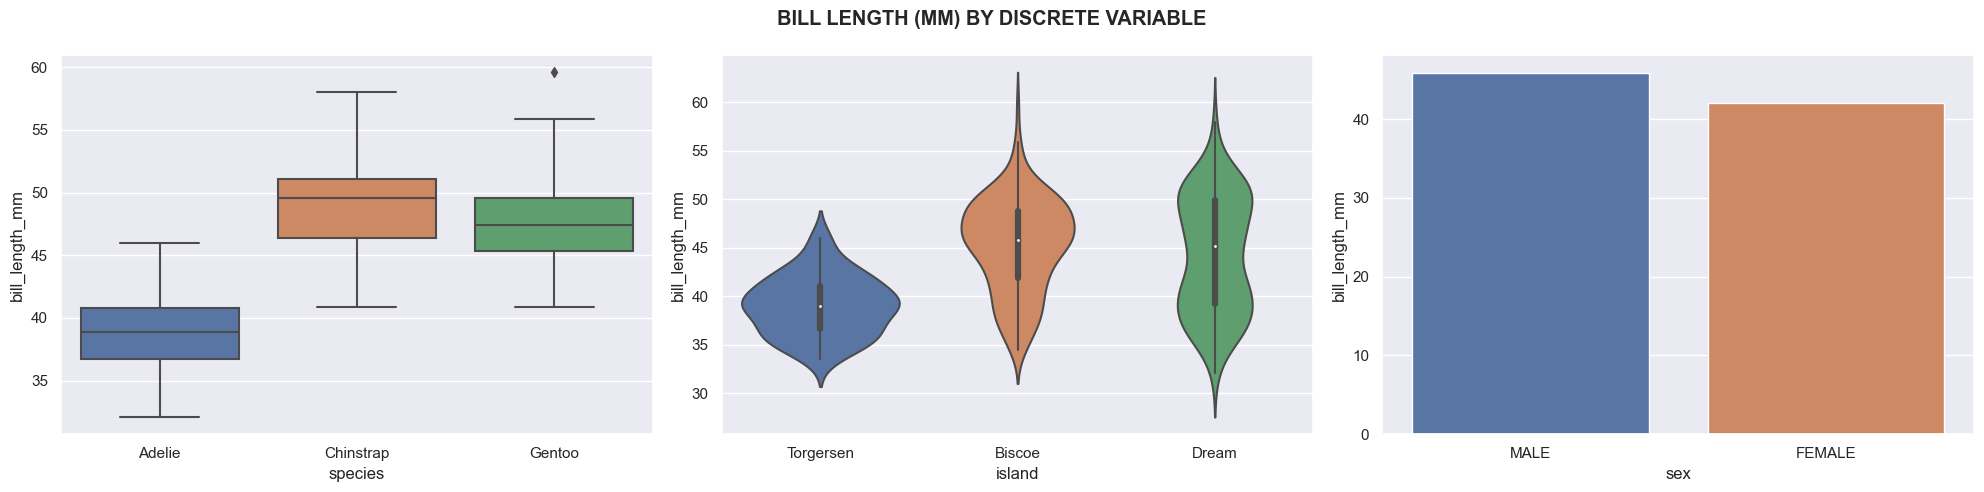

In [30]:
figure, axes = plt.subplots(1, 3, figsize=(20, 5))
figure.suptitle('BILL LENGTH (MM) BY DISCRETE VARIABLE', fontweight='bold')

sns.boxplot(y=df['bill_length_mm'], x=df['species'], ax=axes[0])

sns.violinplot(y=df['bill_length_mm'], x=df['island'], ax=axes[1])

sns.barplot(data=df, x='sex', y='bill_length_mm',
            estimator='mean', errorbar=None, ax=axes[2])

plt.tight_layout()

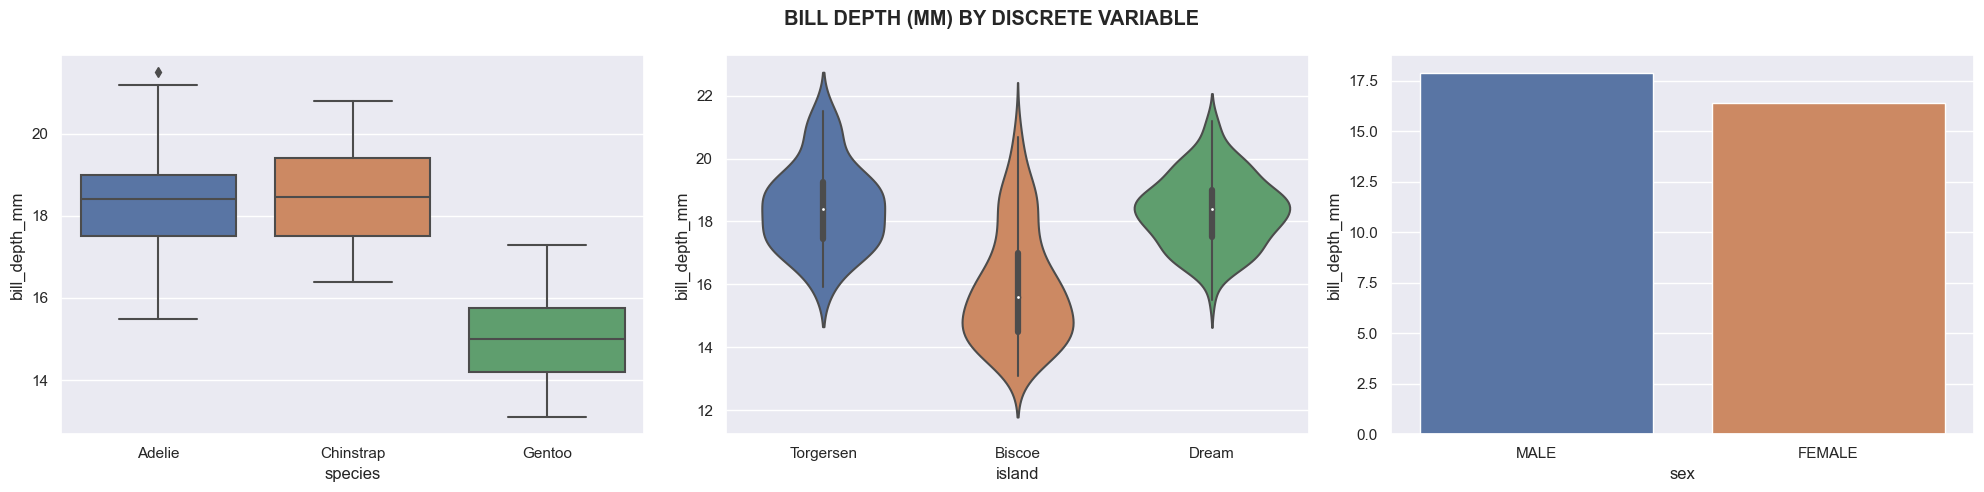

In [31]:
figure, axes = plt.subplots(1, 3, figsize=(20, 5))
figure.suptitle('BILL DEPTH (MM) BY DISCRETE VARIABLE', fontweight='bold')

sns.boxplot(y=df['bill_depth_mm'], x=df['species'], ax=axes[0])

sns.violinplot(y=df['bill_depth_mm'], x=df['island'], ax=axes[1])

sns.barplot(data=df, x='sex', y='bill_depth_mm',
            estimator='mean', errorbar=None, ax=axes[2])

plt.tight_layout()

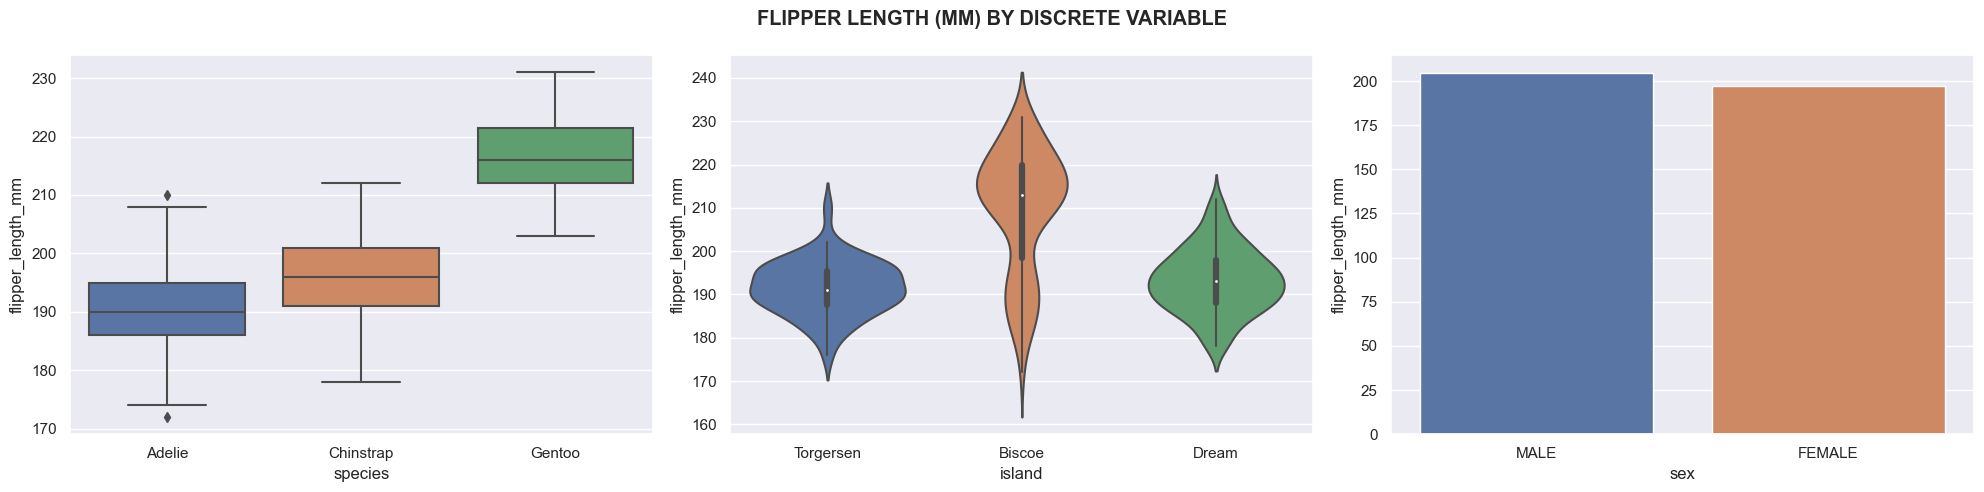

In [32]:
figure, axes = plt.subplots(1, 3, figsize=(20, 5))
figure.suptitle('FLIPPER LENGTH (MM) BY DISCRETE VARIABLE', fontweight='bold')

sns.boxplot(y=df['flipper_length_mm'], x=df['species'], ax=axes[0])

sns.violinplot(y=df['flipper_length_mm'], x=df['island'], ax=axes[1])

sns.barplot(data=df, x='sex', y='flipper_length_mm',
            estimator='mean', errorbar=None, ax=axes[2])

plt.tight_layout()

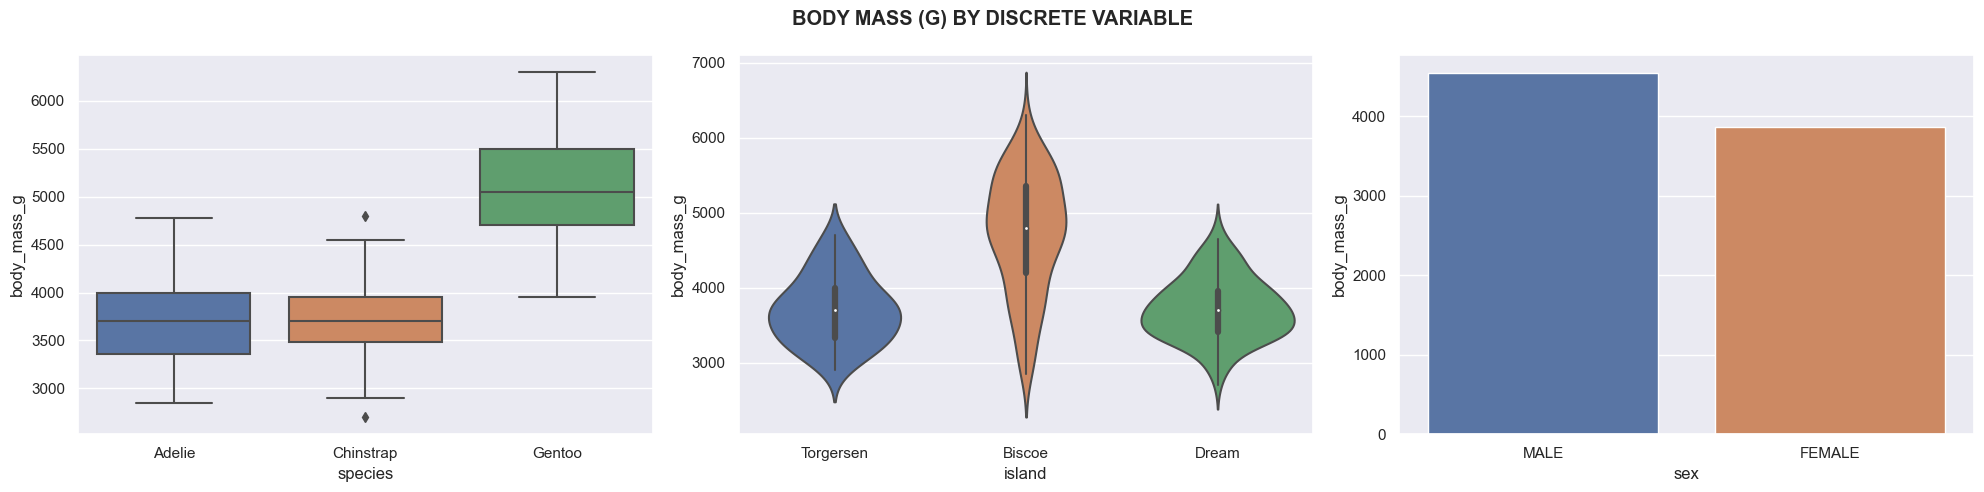

In [33]:
figure, axes = plt.subplots(1, 3, figsize=(20, 5))
figure.suptitle('BODY MASS (G) BY DISCRETE VARIABLE', fontweight='bold')

sns.boxplot(y=df['body_mass_g'], x=df['species'], ax=axes[0])

sns.violinplot(y=df['body_mass_g'], x=df['island'], ax=axes[1])

sns.barplot(data=df, x='sex', y='body_mass_g',
            estimator='mean', errorbar=None, ax=axes[2])

plt.tight_layout()

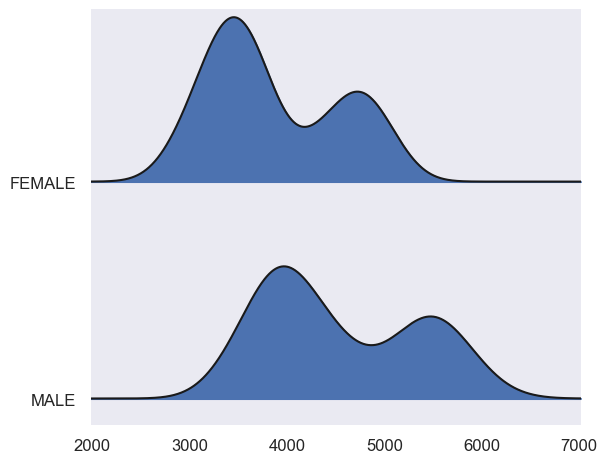

In [34]:
fig, ax = joypy.joyplot(df, by = "sex", column = "body_mass_g")
plt.tight_layout()

# References
---

<ol>
  <li>
    <a href="https://stackoverflow.com/questions/5980042/how-to-implement-the-verbose-or-v-option-into-a-script" id="fn:1">How to implement the --verbose or -v option into a script?</a>
  </li><br>

  <li>
    <a href="https://www.statology.org/pandas-unique-values-in-column/" id="fn:2">Pandas: How to Find Unique Values in a Column</a>
  </li><br>

  <li>
    <a href="https://prvnk10.medium.com/distribution-of-a-categorical-variable-a0628b605e3d" id="fn:3">Distribution of a categorical variable</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_FOURTH_LINK" id="fn:4">Fourth Link Text</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_FIFTH_LINK" id="fn:5">Fifth Link Text</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_SIXTH_LINK" id="fn:6">Sixth Link Text</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_SEVENTH_LINK" id="fn:7">Seventh Link Text</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_EIGHTH_LINK" id="fn:8">Eighth Link Text</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_NINTH_LINK" id="fn:9">Ninth Link Text</a>
  </li><br>

  <li>
    <a href="URL_OF_YOUR_TENTH_LINK" id="fn:10">Tenth Link Text</a>
  </li>
</ol>


In [35]:
sex == Bernoulli or Binominal distribution?


https://www.spcforexcel.com/knowledge/basic-statistics/deciding-which-distribution-fits-your-data-best/


https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/
https://statisticsbyjim.com/basics/goodness-of-fit/
https://statisticsbyjim.com/basics/skewed-distribution/

https://docs.scipy.org/doc/scipy/reference/stats.html

Note that this example covers continuous data. For categorical and discrete variables, you should use the chi-square goodness of fit test.

https://statisticsbyjim.com/hypothesis-testing/chi-square-goodness-of-fit-test/



https://archive.ph/20230811082152/https://towardsdatascience.com/how-to-find-the-best-theoretical-distribution-for-your-data-a26e5673b4bd#selection-643.182-653.170

https://www.datacamp.com/tutorial/probability-distributions-python

https://www.analyticsvidhya.com/blog/2021/09/q-q-plot-ensure-your-ml-model-is-based-on-the-right-distributions/https://archive.ph/20221125141253/https://towardsdatascience.com/understand-q-q-plot-using-simple-python-4f83d5b89f8f#selection-965.3-979.30

https://numpy.org/doc/1.16/reference/routines.random.html

https://stackoverflow.com/questions/45579525/returning-a-dataframe-in-python-function

https://www.geeksforgeeks.org/multi-plot-grid-in-seaborn/


https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart


https://stackoverflow.com/questions/69141790/seaborn-reg-plots-with-the-same-y-axis-scale-side-by-side


Right Skewed. The mean overestimates the most common values in a positively skewed distribution.

Using a QQ Plot to determine if the dristribution follows a probability distribution...?

https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_gumbel_l.html

https://python-charts.com/

https://www.kaggle.com/code/snehagilada/ten-must-know-seaborn-plots#1.-Histograms

***Add more references and sort them out.***

SyntaxError: invalid syntax (3857680640.py, line 4)

***
# End